In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv('./dados/covid19_casos_brasil.csv')

df.describe()

,city_ibge_code,epidemiological_week,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,3.520880e+05,353913.000000,3.520880e+05,353913.000000,344064.000000,353913.000000,353913.000000,353913.000000,353913.000000,353913.000000
mean,3.142813e+06,23.132716,1.347397e+05,324.471347,253.029025,0.051116,15.467372,39.052058,10.504983,0.406764
std,1.024140e+06,3.749478,1.242127e+06,4142.775779,507.736947,0.140634,240.762890,26.185864,126.202119,5.666664
min,1.100000e+01,9.000000,8.370000e+02,0.000000,0.002180,0.000000,0.000000,1.000000,-1578.000000,-82.000000
25%,2.411106e+06,21.000000,7.659000e+03,2.000000,20.935020,0.000000,0.000000,17.000000,0.000000,0.000000
50%,3.134004e+06,24.000000,1.705500e+04,11.000000,75.443230,0.000000,0.000000,35.000000,0.000000,0.000000
75%,4.106209e+06,26.000000,3.816600e+04,53.000000,260.831717,0.041700,2.000000,57.000000,2.000000,0.000000
max,5.300108e+06,29.000000,4.591905e+07,371997.000000,13089.322510,1.000000,17848.000000,139.000000,19030.000000,434.000000


1) Apresentar gráfico do crescimento de casos e mortes de Joinville e os das capitais das regiões Sul e Sudeste. Descreva observações sobre estes gráficos.

In [39]:
cities = {
    'Sul': ['Florianópolis', 'Curitiba', 'Porto Alegre', 'Joinville'],
    'Sudeste': ['Vitória', 'Belo Horizonte', 'Rio de Janeiro', 'São Paulo']
}

df_filtered = df[df['city'].isin(cities['Sul'] + cities['Sudeste'])]

df_filtered['date'] = pd.to_datetime(df_filtered['date'])

print(df_filtered)

                  city  city_ibge_code       date  epidemiological_week  \
0            São Paulo       3550308.0 2020-02-25                     9   
2            São Paulo       3550308.0 2020-02-26                     9   
4            São Paulo       3550308.0 2020-02-27                     9   
6            São Paulo       3550308.0 2020-02-28                     9   
8            São Paulo       3550308.0 2020-02-29                     9   
...                ...             ...        ...                   ...   
352063  Rio de Janeiro       3304557.0 2020-07-12                    29   
352605    Porto Alegre       4314902.0 2020-07-12                    29   
352842   Florianópolis       4205407.0 2020-07-12                    29   
352892       Joinville       4209102.0 2020-07-12                    29   
353684       São Paulo       3550308.0 2020-07-12                    29   

        estimated_population_2019  is_last  is_repeated  \
0                      12252023.0    Fal

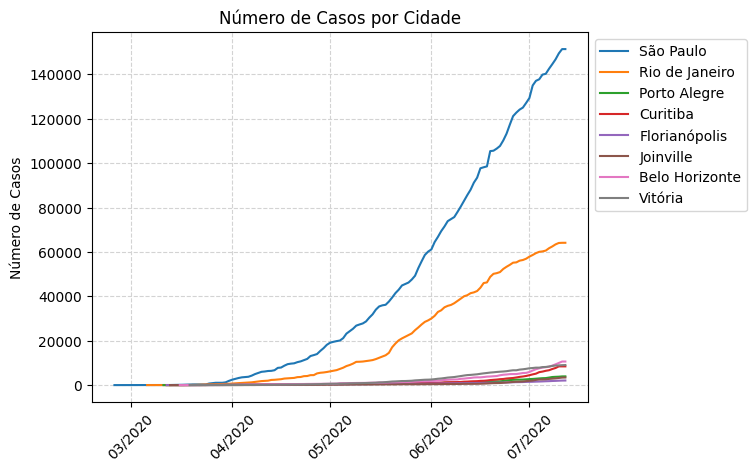

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates 

sns.lineplot(data=df_filtered, x='date', y='last_available_confirmed', hue='city', palette='tab10')
plt.xlabel('')
plt.ylabel('Número de Casos')
plt.title('Número de Casos por Cidade')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', color='lightgray')

plt.show()

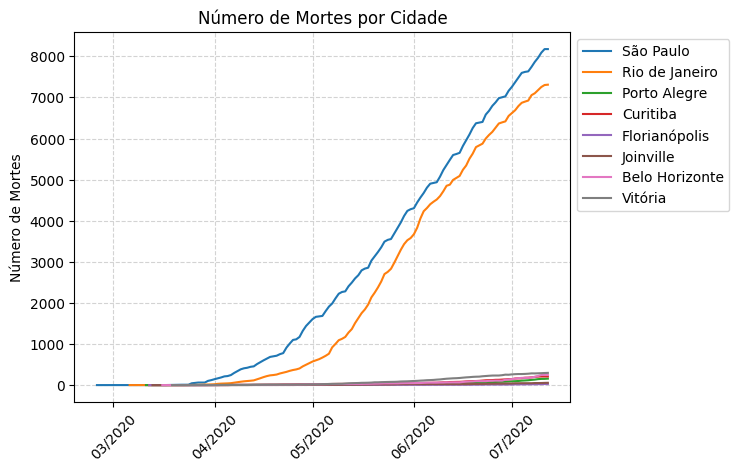

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates 

sns.lineplot(data=df_filtered, x='date', y='last_available_deaths', hue='city', palette='tab10')
plt.xlabel('')
plt.ylabel('Número de Mortes')
plt.title('Número de Mortes por Cidade')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', color='lightgray')

plt.show()

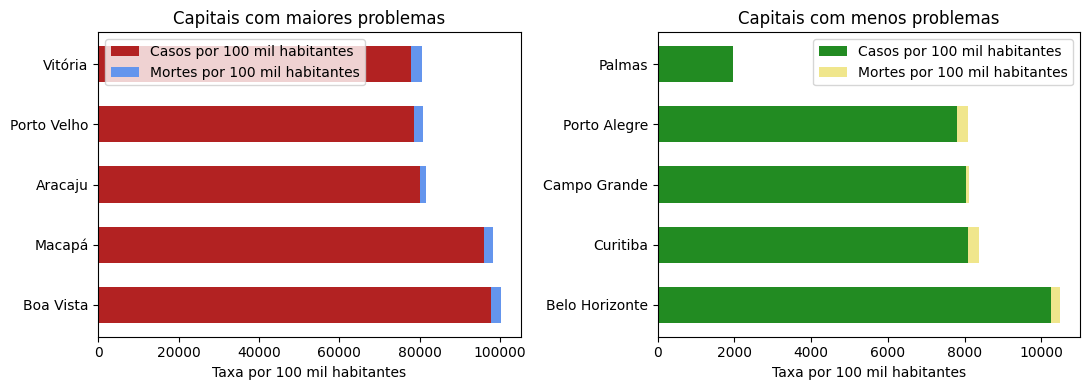

In [96]:
capitais_brasileiras = [
    "Rio Branco", "Maceió", "Macapá", "Manaus", "Salvador", "Fortaleza", "Brasília", "Vitória", "Goiânia",
    "São Luís", "Cuiabá", "Campo Grande", "Belo Horizonte", "Belém", "João Pessoa", "Curitiba", "Recife",
    "Teresina", "Rio de Janeiro", "Natal", "Porto Alegre", "Porto Velho", "Boa Vista", "Florianópolis",
    "São Paulo", "Aracaju", "Palmas"
]

capitais = df[df['city'].isin(capitais_brasileiras)]

capitais = capitais.drop_duplicates(subset=['city_ibge_code', 'last_available_date'])

grouped = capitais.groupby('city_ibge_code').agg({
    'city': 'last',
    'estimated_population_2019': 'last',
    'last_available_confirmed': 'sum',
    'last_available_deaths': 'sum'
})

grouped['cases_per_100k'] = (grouped['last_available_confirmed'] / grouped['estimated_population_2019'] * 100000).round(2)
grouped['deaths_per_100k'] = (grouped['last_available_deaths'] / grouped['estimated_population_2019'] * 100000).round(2)

grouped = grouped.sort_values(by='cases_per_100k', ascending=False)

maiores_problemas = grouped.head(5)
pouco_sem_problema = grouped.tail(5)

plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 1)
plt.barh(maiores_problemas['city'], maiores_problemas['cases_per_100k'], color='firebrick', label='Casos por 100 mil habitantes', height=0.6)
plt.barh(maiores_problemas['city'], maiores_problemas['deaths_per_100k'], color='cornflowerblue', left=maiores_problemas['cases_per_100k'], label='Mortes por 100 mil habitantes', height=0.6)
plt.xlabel('Taxa por 100 mil habitantes')
plt.title('Capitais com maiores problemas')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.barh(pouco_sem_problema['city'], pouco_sem_problema['cases_per_100k'], color='forestgreen', label='Casos por 100 mil habitantes', height=0.6)
plt.barh(pouco_sem_problema['city'], pouco_sem_problema['deaths_per_100k'], color='khaki', left=pouco_sem_problema['cases_per_100k'], label='Mortes por 100 mil habitantes', height=0.6)
plt.xlabel('Taxa por 100 mil habitantes')
plt.title('Capitais com menos problemas')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


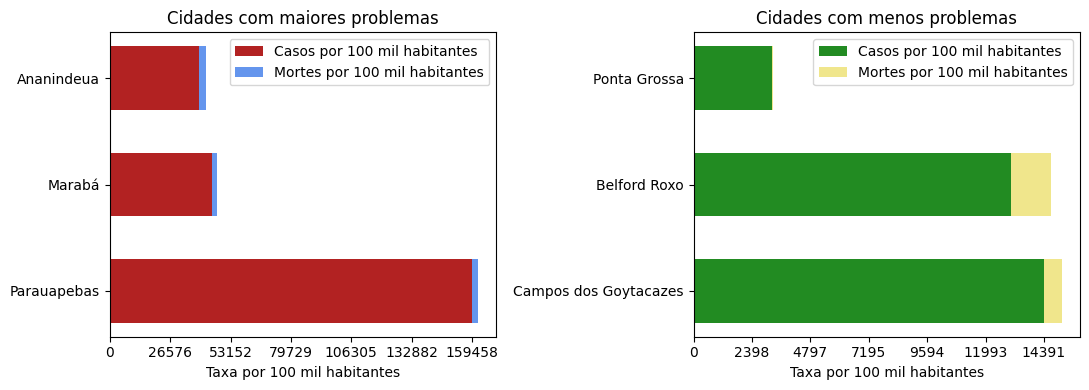

In [104]:
cidades_grupo = [
    "Duque de Caxias", "Nova Iguaçu", "Campos dos Goytacazes", "Belford Roxo",
    "Ananindeua", "Santarém", "Parauapebas", "Marabá", "Castanhal",
    "Florianópolis", "Ponta Grossa"
]

grupo = df[df['city'].isin(cidades_grupo)]

grupo = grupo.drop_duplicates(subset=['city_ibge_code', 'last_available_date'])

grouped = grupo.groupby('city_ibge_code').agg({
    'city': 'last',
    'estimated_population_2019': 'last',
    'last_available_confirmed': 'sum',
    'last_available_deaths': 'sum'
})

grouped['cases_per_100k'] = (grouped['last_available_confirmed'] / grouped['estimated_population_2019'] * 100000).round(2)
grouped['deaths_per_100k'] = (grouped['last_available_deaths'] / grouped['estimated_population_2019'] * 100000).round(2)

grouped = grouped.sort_values(by='cases_per_100k', ascending=False)

maiores_problemas = grouped.head(3)
pouco_sem_problema = grouped.tail(3)

plt.figure(figsize=(11, 4))

x_values = np.linspace(0, max(maiores_problemas['cases_per_100k']), 7)  
x_values = [int(x) for x in x_values] 

y_values = np.linspace(0, max(pouco_sem_problema['cases_per_100k']), 7)  
y_values = [int(x) for x in y_values] 

plt.subplot(1, 2, 1)
plt.barh(maiores_problemas['city'], maiores_problemas['cases_per_100k'], color='firebrick', label='Casos por 100 mil habitantes', height=0.6)
plt.barh(maiores_problemas['city'], maiores_problemas['deaths_per_100k'], color='cornflowerblue', left=maiores_problemas['cases_per_100k'], label='Mortes por 100 mil habitantes', height=0.6)
plt.xlabel('Taxa por 100 mil habitantes')
plt.title('Cidades com maiores problemas')
plt.xticks(x_values)
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.barh(pouco_sem_problema['city'], pouco_sem_problema['cases_per_100k'], color='forestgreen', label='Casos por 100 mil habitantes', height=0.6)
plt.barh(pouco_sem_problema['city'], pouco_sem_problema['deaths_per_100k'], color='khaki', left=pouco_sem_problema['cases_per_100k'], label='Mortes por 100 mil habitantes', height=0.6)
plt.xlabel('Taxa por 100 mil habitantes')
plt.title('Cidades com menos problemas')
plt.xticks(y_values)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
